# Papers

## VGGFace Dataset

https://exposing.ai/vgg_face/


---

"The VGG Face dataset was created to provide access to biometric data to researchers working on face recognition technologies."




## VGGFace2 Model

https://www.dlology.com/blog/live-face-identification-with-pre-trained-vggface2-model/
https://github.com/Tony607/Keras_face_identification_realtime
---
Abstract Analysis:

"One challenge of face identification is that when you want to add a new person to the existing list. Do you retrain your network with tons of this new person's face images along with others'? If we build a classification model, how can the model classify an unknown face?"



*   The study's goal seems to be model generalizeability

"In this demo, we tackle the challenge by computing the similarity of two faces, one in our database, one face image we captured on webcam.

The VGGFace model "encodes" a face into a representation of 2048 numbers.

We then compute the Euclidean distance between two "encoded" faces. If they are the same person, the distance value will be low, if they are from two different persons, the value will be high.

During the face identification time, if the value is below a threshold, we would predict that those two pictures are the same person."


*   Similar to FaceNet in bringing to feature space, different methodologies.
*   Also different purpose- this is for predicting the images to be of the same person. The model could be used for a similar goal as FaceNet using transfer learning, though.

"The model itself is based on RESNET50 architecture, which is popular in processing image data."

*   Can talk about Residual Blocks in presentation




## FaceNet

https://arxiv.org/abs/1503.03832
https://github.com/davidsandberg/facenet
---
Abstract Analysis:

"In this paper we present a system, called FaceNet, that directly learns a mapping from face images to a compact Euclidean space where distances directly correspond to a measure of face similarity.

 Once this space has been produced, tasks such as face recognition, verification and clustering can be easily implemented using standard techniques with FaceNet embeddings as feature vectors."

*   Can reference how this is like using Kernels in presentation

"Our method uses a deep convolutional network trained to directly optimize the embedding itself, rather than an intermediate bottleneck layer as in previous deep learning approaches. 
To train, we use triplets of roughly aligned matching / non-matching face patches generated using a novel online triplet mining method. 
"The benefit of our approach is much greater representational efficiency: we achieve state-of-the-art face recognition performance using only 128-bytes per face."

*   Investigate 'directly optimize embedding itself rather than an intermediate bottleneck layer'
*   Investigate 'novel online triplet mining method'
*   The study sacrifices accuracy in their goal for signicant efficiency in storage and speed

"On the widely used Labeled Faces in the Wild (LFW) dataset, our system achieves a new record accuracy of 99.63%.

On YouTube Faces DB it achieves 95.12%. Our system cuts the error rate in comparison to the best published result by 30% on both datasets."

*   ...but their accuracy is still very high. Investigate risk of overfitting? Transfer learning capability?

"We also introduce the concept of harmonic embeddings, and a harmonic triplet loss, which describe different versions of face embeddings (produced by different networks) that are compatible to each other and allow for direct comparison between each other."

*   Investigate these concepts




# Libraries


In [ ]:
!pip install kaggle
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from deepface import DeepFace
import tensorflow as tf
import os
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Models

## Face Mask Detection with VGGFace2

Using keras.vggface

https://libraries.io/pypi/keras-vggface

### Load Data

https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset

Data Exploration

---







In [ ]:
#remember to upload kaggle.json API key
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset
!unzip face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
BATCH_SIZE =64
IMG_SIZE = (256, 256)
PATH = '/content/Face Mask Dataset/'

def loadSet(dir):
  dir = os.path.join(PATH, dir)
  ds= tf.keras.preprocessing.image_dataset_from_directory(
                                                      dir,
                                                      batch_size = BATCH_SIZE,
                                                      image_size=IMG_SIZE,
                                                      label_mode='binary', #Sparse_categorical_crossentropy_loss to be used
                                                      class_names = ['WithMask','WithoutMask'],
                                                      seed=123,
                                                      shuffle=True)
  return ds
train_ds= loadSet('Train')
valid_ds= loadSet('Validation')
test_ds = loadSet('Test')

Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


In [ ]:
# autotune buffer to avoid I/0 block
#https://stackoverflow.com/questions/56613155/tensorflow-tf-data-autotune
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Data Visualization

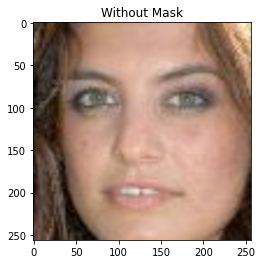

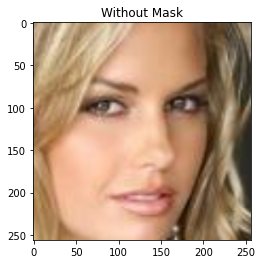

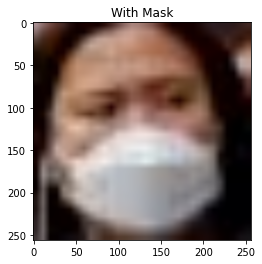

In [ ]:
# data visualization
title_label = {1: "Without Mask", 0: "With Mask"}
for images, labels in train_ds.take(1):
    for i in np.arange(3):
        plt.title(title_label[int(labels[i])] )
        plt.imshow(images[i]/255.)
        plt.show()
    break

### Load Model

In [ ]:
!pip install keras_applications
!pip install keras_vggface

     |████████████████████████████████| 50 kB 5.9 MB/s 


from keras.engine.topology import get_source_inputs
to

from keras.utils.layer_utils import get_source_inputs
in usr/local/lib/python3.7/dist-packages/keras_vggface/models.py

In [ ]:
from keras_vggface.vggface import VGGFace

base_model = VGGFace(include_top=False,
                            input_shape=(256,256,3),
                            pooling='avg',weights='vggface')
base_model.trainable=False

58925056/58909280 [==============================] - 18s 0us/step


In [ ]:
base_model.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 256, 256, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 256, 256, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 128, 128, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 128, 128, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 128, 128, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 64, 64, 128)     

### Feature Extraction

In [ ]:
#Add classification head

data_rescale = tf.keras.layers.Rescaling(1./255.)

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2)
])

inputs = tf.keras.Input(shape=(256, 256, 3))
x = data_rescale(inputs)
x = data_augmentation(x)
x = base_model(x, training=False)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(2,activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
#Compile Model
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 vggface_vgg16 (Functional)  (None, 512)               14714688  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 1,026
Non-trainabl

In [ ]:
initial_epochs = 5
loss0, accuracy0 = model.evaluate(valid_ds)

13/13 [==============================] - 21s 572ms/step - loss: 0.6974 - accuracy: 0.5000


This untrained model right now has 50% accuracy; Essentially it's acting as a coin flip!

In [ ]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=valid_ds)

Epoch 1/5
157/157 [==============================] - 85s 529ms/step - loss: 0.6638 - accuracy: 0.6867 - val_loss: 0.5681 - val_accuracy: 0.7650
Epoch 2/5
157/157 [==============================] - 82s 521ms/step - loss: 0.6141 - accuracy: 0.7951 - val_loss: 0.4866 - val_accuracy: 0.8325
Epoch 3/5
157/157 [==============================] - 82s 522ms/step - loss: 0.5772 - accuracy: 0.8017 - val_loss: 0.4325 - val_accuracy: 0.8562
Epoch 4/5
157/157 [==============================] - 82s 523ms/step - loss: 0.5478 - accuracy: 0.8123 - val_loss: 0.3895 - val_accuracy: 0.8850
Epoch 5/5
157/157 [==============================] - 82s 522ms/step - loss: 0.5224 - accuracy: 0.8216 - val_loss: 0.3564 - val_accuracy: 0.8938


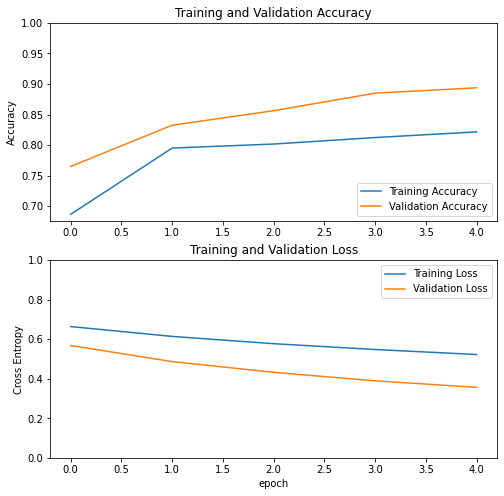

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Fine Tuning

In [ ]:
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  20


In [ ]:
fine_tune_at = len(base_model.layers) - 5
# freeze all layers before `fine_tune_at` layer


for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1*base_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 vggface_vgg16 (Functional)  (None, 512)               14714688  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 7,080,450
Non-trai

In [ ]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=valid_ds)

Epoch 5/10
157/157 [==============================] - 91s 567ms/step - loss: 0.1357 - accuracy: 0.9473 - val_loss: 0.0316 - val_accuracy: 0.9912
Epoch 6/10
157/157 [==============================] - 89s 565ms/step - loss: 0.0565 - accuracy: 0.9804 - val_loss: 0.0529 - val_accuracy: 0.9800
Epoch 7/10
157/157 [==============================] - 88s 564ms/step - loss: 0.0384 - accuracy: 0.9870 - val_loss: 0.0216 - val_accuracy: 0.9925
Epoch 8/10
157/157 [==============================] - 89s 564ms/step - loss: 0.0286 - accuracy: 0.9899 - val_loss: 0.0079 - val_accuracy: 0.9975
Epoch 9/10
157/157 [==============================] - 89s 564ms/step - loss: 0.0265 - accuracy: 0.9907 - val_loss: 0.0159 - val_accuracy: 0.9962
Epoch 10/10
157/157 [==============================] - 89s 564ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0087 - val_accuracy: 0.9962


In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

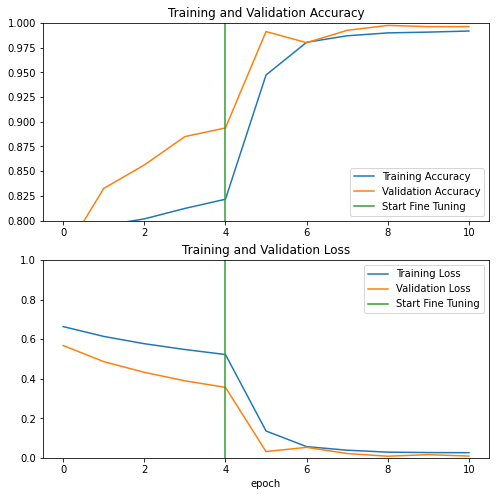

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss1, accuracy1 = model.evaluate(test_ds)

16/16 [==============================] - 8s 459ms/step - loss: 0.0119 - accuracy: 0.9950


In [ ]:
print("Test accuracy: ",accuracy1)
print("Test loss :",loss1)

Test accuracy:  0.9949596524238586
Test loss : 0.011883740313351154


## Learn emotions/facial expressions from images w/ FaceNet


---
https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data



### Load Data

In [ ]:
#remember to upload kaggle.json API key
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge
!unzip challenges-in-representation-learning-facial-expression-recognition-challenge

In [ ]:
train_df = pd.read_csv('train.csv')

### Data Visualization

In [ ]:
emotion_label = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [ ]:
visual = (train_df.emotion.value_counts() / len(train_df)).to_frame().sort_index().T
visual.columns = ['Anger','Disgust','Fear','Happy','Sad','Surprise','Neutral']
visual

,Anger,Disgust,Fear,Happy,Sad,Surprise,Neutral
emotion,0.139155,0.015187,0.142708,0.251315,0.16824,0.110453,0.172942


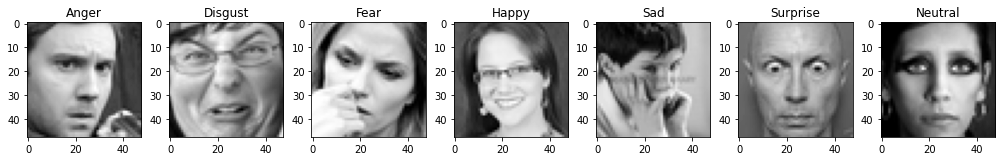

In [ ]:
plt.figure(7,(14,14))
for i,label in enumerate(sorted(train_df['emotion'].unique())):
  img = train_df[train_df.emotion == label]['pixels'].iloc[0]
  plt.subplot(7,7,i+1)
  plt.imshow(np.asarray(img.split(' ')).reshape(48,48).astype('float32'),cmap='gray')
  plt.title(emotion_label[label])
plt.tight_layout()
plt.show()

### Data Preprocessing

In [ ]:
train_df['pixels'] = [np.fromstring(x, dtype=int, sep=' ').reshape(-1,48,48,1) for x in train_df['pixels']]
images = np.concatenate(train_df.pixels)
labels = train_df['emotion'].to_numpy()

images.shape,labels.shape

((28709, 48, 48, 1), (28709,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images,labels,test_size=0.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

X_train = tf.image.grayscale_to_rgb(
  tf.convert_to_tensor(X_train,dtype=tf.float32)
)
X_valid =  tf.image.grayscale_to_rgb(
  tf.convert_to_tensor(X_valid,dtype=tf.float32)
)
X_test =  tf.image.grayscale_to_rgb(
  tf.convert_to_tensor(X_test,dtype=tf.float32)
)

y_train = tf.keras.utils.to_categorical(y_train)
y_valid = tf.keras.utils.to_categorical(y_valid)
y_test =  tf.keras.utils.to_categorical(y_test)
print(X_train.shape,X_valid.shape,X_test.shape)
print(y_train.shape,y_valid.shape,y_test.shape)

(20670, 48, 48, 3) (2297, 48, 48, 3) (5742, 48, 48, 3)
(20670, 7) (2297, 7) (5742, 7)


### Load Model


---
https://pypi.org/project/deepface/


In [ ]:
base_model = DeepFace.build_model(model_name="Facenet512")

In [ ]:
base_model.summary() #expects (160,160,3) images

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)         (None, 79, 79, 32)   864         ['input_1[0][0]']                
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (Batch  (None, 79, 79, 32)  96          ['Conv2d_1a_3x3[0][0]']          
 Normalization)                                                                                   
                                                                                

### Feature Extraction

In [ ]:
base_model.trainable=False

In [ ]:
#Add classification head
data_resize = tf.keras.layers.Resizing(160,160)
data_rescale = tf.keras.layers.Rescaling(1./255.)

inputs = tf.keras.Input(shape=(48,48, 3))
x = data_resize(inputs)
x = data_rescale(x)
x = base_model(x, training=False)
#model already has dropout layer
#training=false for batchnorm protection
outputs = tf.keras.layers.Dense(7,activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

#Compile Model
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 resizing_5 (Resizing)       (None, 160, 160, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 sequential_5 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 inception_resnet_v1 (Functi  (None, 512)              23497424  
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                           

In [ ]:
initial_epochs = 5
loss0, accuracy0 = model.evaluate(X_valid,y_valid)

72/72 [==============================] - 6s 50ms/step - loss: 2.0717 - accuracy: 0.1445


In [ ]:
history = model.fit(X_train,y_train,
                    epochs=initial_epochs,
                    validation_data=(X_valid,y_valid))

Epoch 1/5
646/646 [==============================] - 91s 103ms/step - loss: 1.8859 - accuracy: 0.2468 - val_loss: 1.7451 - val_accuracy: 0.3243
Epoch 2/5
646/646 [==============================] - 52s 81ms/step - loss: 1.8034 - accuracy: 0.2638 - val_loss: 1.7101 - val_accuracy: 0.3291
Epoch 3/5
646/646 [==============================] - 51s 79ms/step - loss: 1.7862 - accuracy: 0.2743 - val_loss: 1.7282 - val_accuracy: 0.3300
Epoch 4/5
646/646 [==============================] - 51s 79ms/step - loss: 1.7733 - accuracy: 0.2808 - val_loss: 1.7220 - val_accuracy: 0.3274
Epoch 5/5
646/646 [==============================] - 49s 76ms/step - loss: 1.7591 - accuracy: 0.2840 - val_loss: 1.7400 - val_accuracy: 0.3217


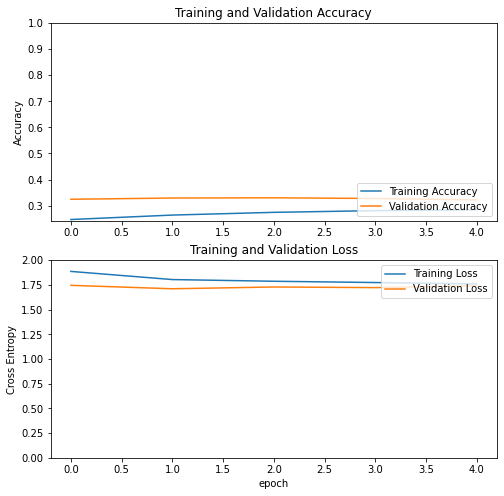

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Fine Tuning

In [ ]:
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  447


In [ ]:
fine_tune_at = len(base_model.layers) - 300
# freeze all layers before `fine_tune_at` layer


for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.25*base_learning_rate),
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 resizing_9 (Resizing)       (None, 160, 160, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 inception_resnet_v1 (Functi  (None, 512)              23497424  
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 23,501,015
Trainable params: 20,761,223
Non-trainable params: 2,739,792
_______________________________________

In [ ]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(X_train,y_train,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=(X_valid,y_valid))

Epoch 5/10
646/646 [==============================] - 79s 109ms/step - loss: 1.0447 - accuracy: 0.6090 - val_loss: 1.0284 - val_accuracy: 0.5990
Epoch 6/10
646/646 [==============================] - 68s 105ms/step - loss: 0.8206 - accuracy: 0.6953 - val_loss: 1.0231 - val_accuracy: 0.6456
Epoch 7/10
646/646 [==============================] - 69s 107ms/step - loss: 0.5934 - accuracy: 0.7816 - val_loss: 1.1238 - val_accuracy: 0.6330
Epoch 8/10
646/646 [==============================] - 69s 106ms/step - loss: 0.3803 - accuracy: 0.8628 - val_loss: 1.2324 - val_accuracy: 0.6300
Epoch 9/10
646/646 [==============================] - 71s 109ms/step - loss: 0.2458 - accuracy: 0.9151 - val_loss: 1.4688 - val_accuracy: 0.6317
Epoch 10/10
646/646 [==============================] - 69s 107ms/step - loss: 0.1749 - accuracy: 0.9419 - val_loss: 1.7519 - val_accuracy: 0.6356


In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

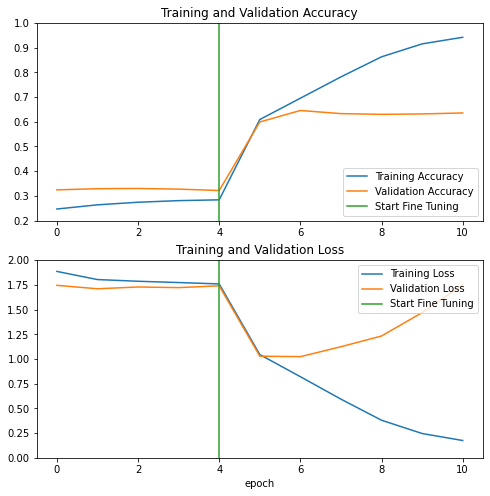

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.2, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 2.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss1, accuracy1 = model.evaluate(X_test,y_test)
print(accuracy1)